In [1]:
#importing the required libraries for Analysis
import pandas as pd
import numpy as np
import seaborn as sns
from numpy import sqrt
from pandas import Grouper
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose## with the help of this we will be able to creat graphs for the dfferent components of time series data like trends, level, sesional components and residual data
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import date
import calendar
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing Dataset
df = pd.read_csv('D:\\Downloads\\Gold_data.csv')
df

,date,price
0,01-01-2016,2252.60
1,02-01-2016,2454.50
2,03-01-2016,2708.10
3,04-01-2016,2577.80
4,05-01-2016,2597.75
...,...,...
2177,17-12-2021,4394.40
2178,18-12-2021,4389.50
2179,19-12-2021,4389.50
2180,20-12-2021,4354.10


In [3]:
df.dtypes

date      object
price    float64
dtype: object

In [4]:
df['date']= pd.to_datetime(df['date'])
df.dtypes

date     datetime64[ns]
price           float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2182 non-null   datetime64[ns]
 1   price   2182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.2 KB


In [6]:
df1= df.copy()
# making the date column as index
df1.set_index('date',inplace=True)
df1

,price
date,
2016-01-01,2252.60
2016-02-01,2454.50
2016-03-01,2708.10
2016-04-01,2577.80
2016-05-01,2597.75
...,...
2021-12-17,4394.40
2021-12-18,4389.50
2021-12-19,4389.50


In [7]:
df2 = df.copy()

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday']=pd.to_datetime(df['date']).dt.day_name()

In [9]:
df

,date,price,Year,Month,day,weekday
0,2016-01-01,2252.60,2016,1,1,Friday
1,2016-02-01,2454.50,2016,2,1,Monday
2,2016-03-01,2708.10,2016,3,1,Tuesday
3,2016-04-01,2577.80,2016,4,1,Friday
4,2016-05-01,2597.75,2016,5,1,Sunday
...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,17,Friday
2178,2021-12-18,4389.50,2021,12,18,Saturday
2179,2021-12-19,4389.50,2021,12,19,Sunday
2180,2021-12-20,4354.10,2021,12,20,Monday


In [10]:
# making the date column as index
df.set_index('date',inplace=True)
df

,price,Year,Month,day,weekday
date,,,,,
2016-01-01,2252.60,2016,1,1,Friday
2016-02-01,2454.50,2016,2,1,Monday
2016-03-01,2708.10,2016,3,1,Tuesday
2016-04-01,2577.80,2016,4,1,Friday
2016-05-01,2597.75,2016,5,1,Sunday
...,...,...,...,...,...
2021-12-17,4394.40,2021,12,17,Friday
2021-12-18,4389.50,2021,12,18,Saturday
2021-12-19,4389.50,2021,12,19,Sunday


In [11]:
df.index.year

Int64Index([2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
            ...
            2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021],
           dtype='int64', name='date', length=2182)

In [12]:
df.isnull().sum()

price      0
Year       0
Month      0
day        0
weekday    0
dtype: int64

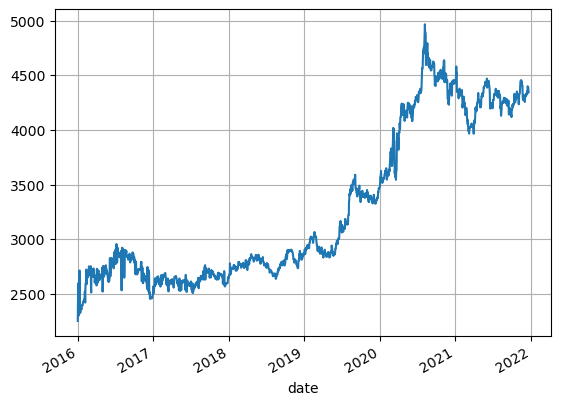

In [13]:
# Visualization of Data Checking the line plot,Histogram and Density Plots,create a density plot,
# Box and Whisker Plots by Interval,Lag Plot, Autocorrelation Plot
df['price'].plot()
plt.grid()
plt.show()

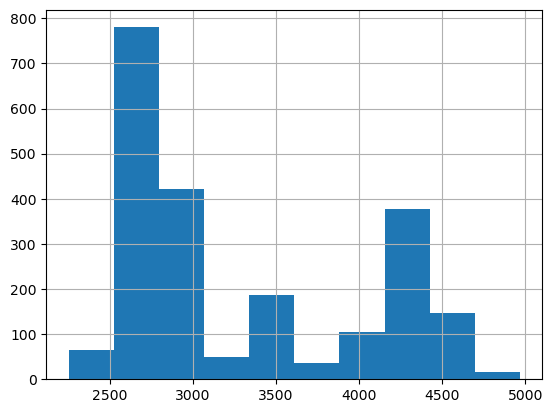

In [14]:
# here we can say that the trend is upward and the sessionality is multiplicative
# Histogram and Density Plots
df['price'].hist()
plt.show()

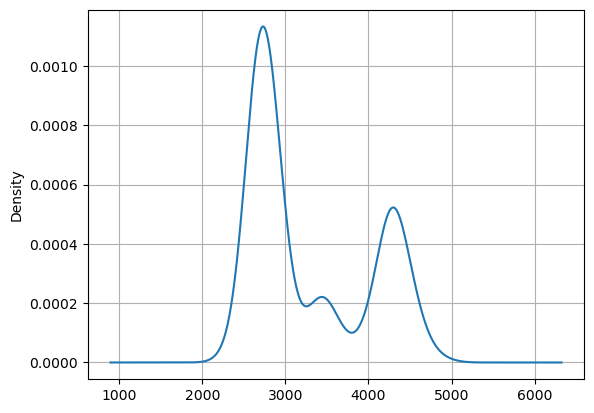

In [15]:
# create a density plot
df['price'].plot(kind='kde')
plt.grid()
plt.show()

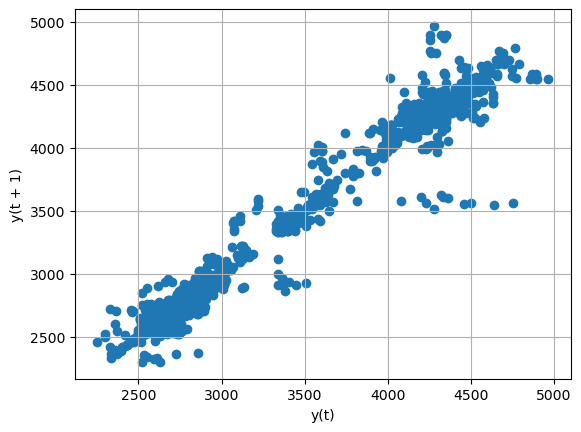

In [16]:
#Lag_plot
lag_plot(df['price'])
plt.grid()
plt.show()

<AxesSubplot:>

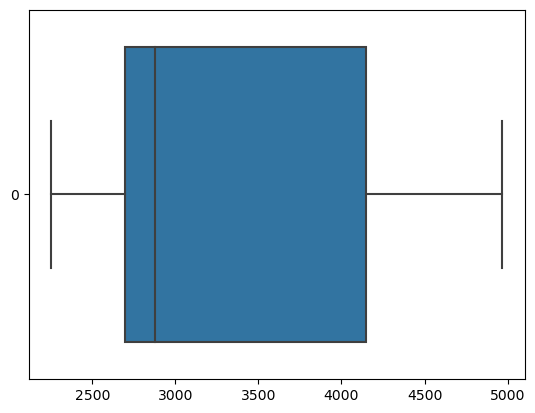

In [17]:
sns.boxplot(data=df['price'], orient="h")

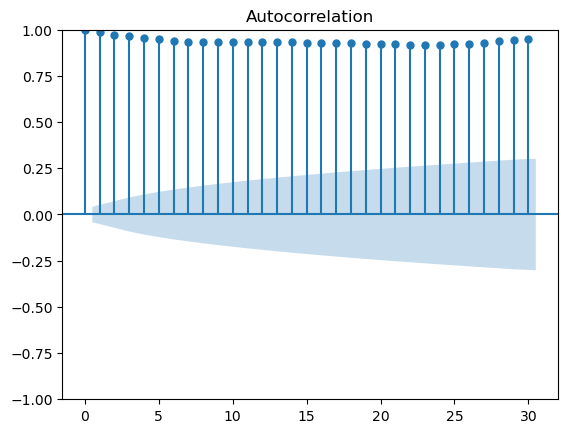

In [18]:
#Autocorrelation Plot
plot_acf(df['price'],lags=30)
plt.show()

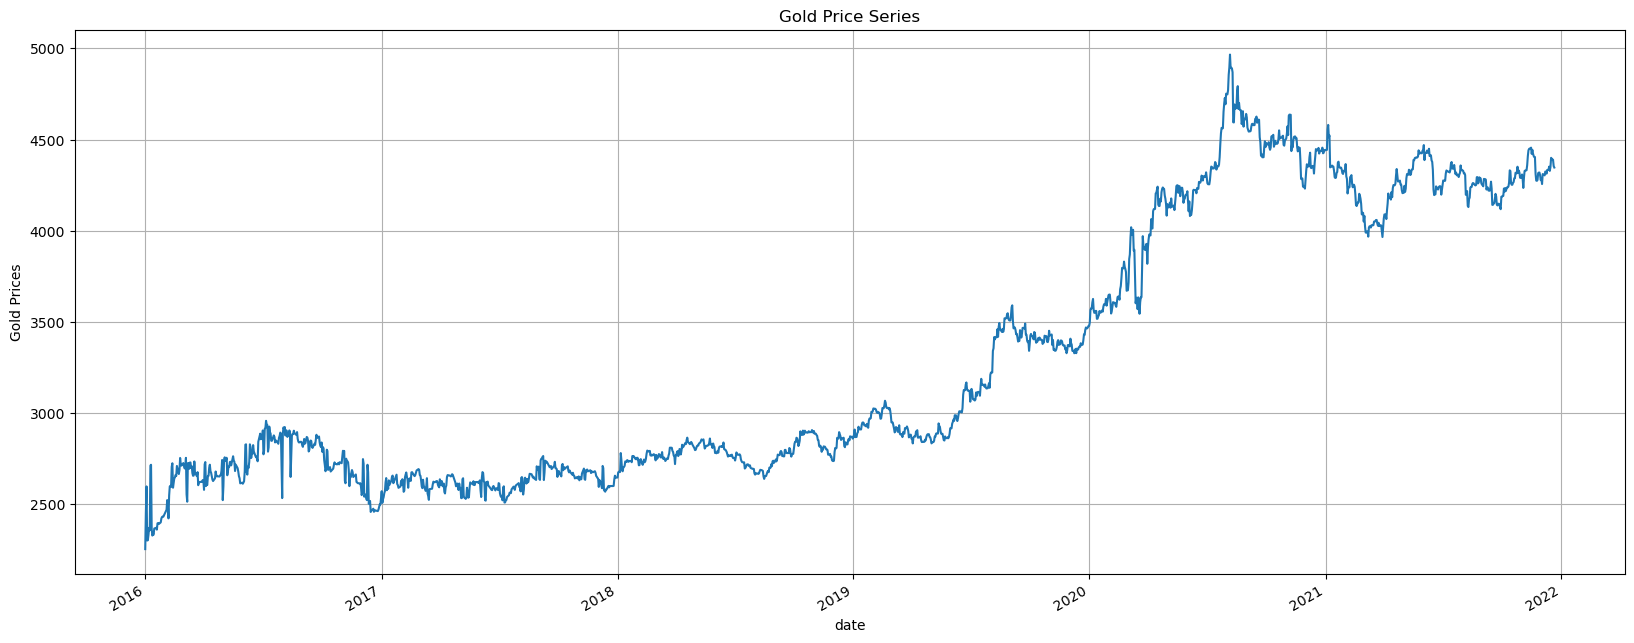

In [19]:
df['price'].plot(figsize=(20,8))
plt.ylabel("Gold Prices")
plt.title("Gold Price Series")
plt.grid()
plt.show()

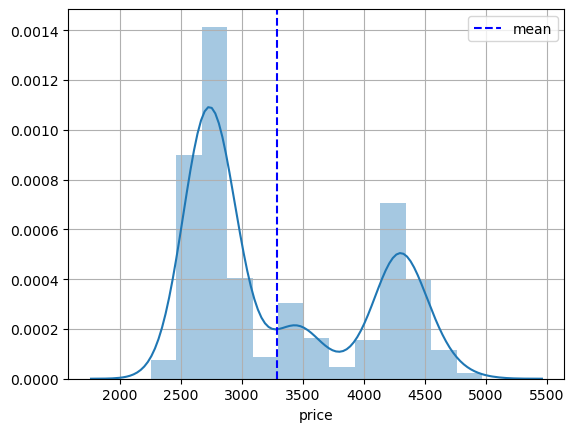

In [20]:
sns.distplot(df['price'])
plt.grid()
plt.axvline(x=np.mean(df['price']), c='blue', ls='--', label='mean')
plt.legend()

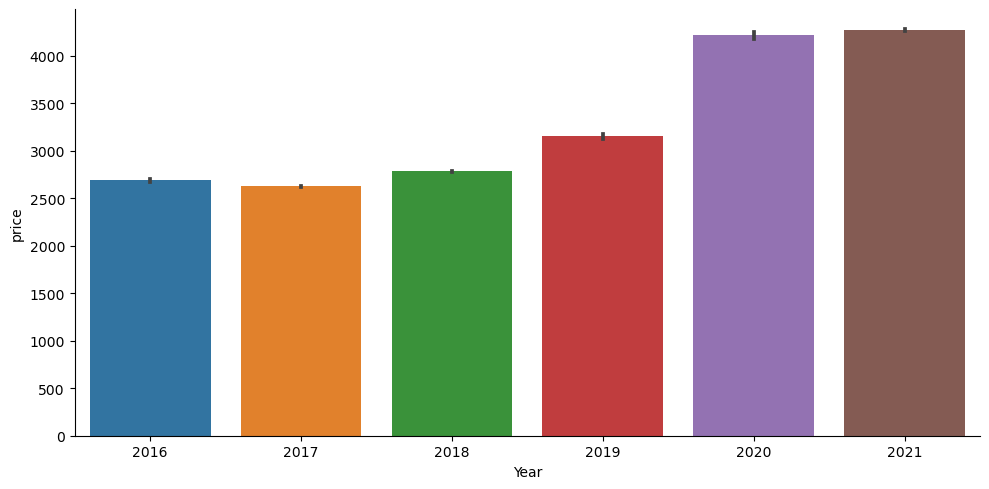

In [21]:
#Yearly Pricing
sns.catplot(x='Year',y='price',data=df,kind='bar',aspect=2)

<AxesSubplot:xlabel='Month', ylabel='price'>

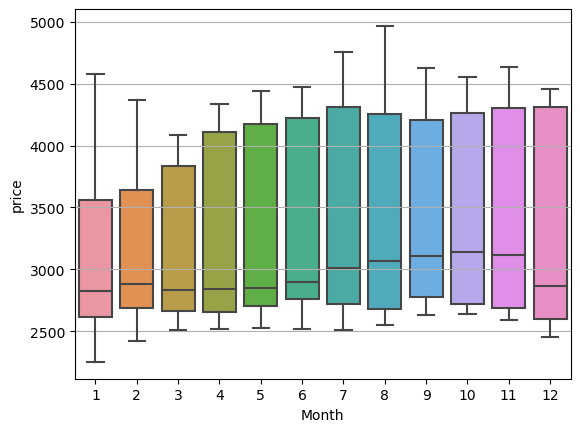

In [22]:
# Monthly Pricing
plt.grid()
sns.boxplot(x='Month', y='price', data=df.loc[~df.Month.isin([0,13]), :])

<AxesSubplot:xlabel='day', ylabel='price'>

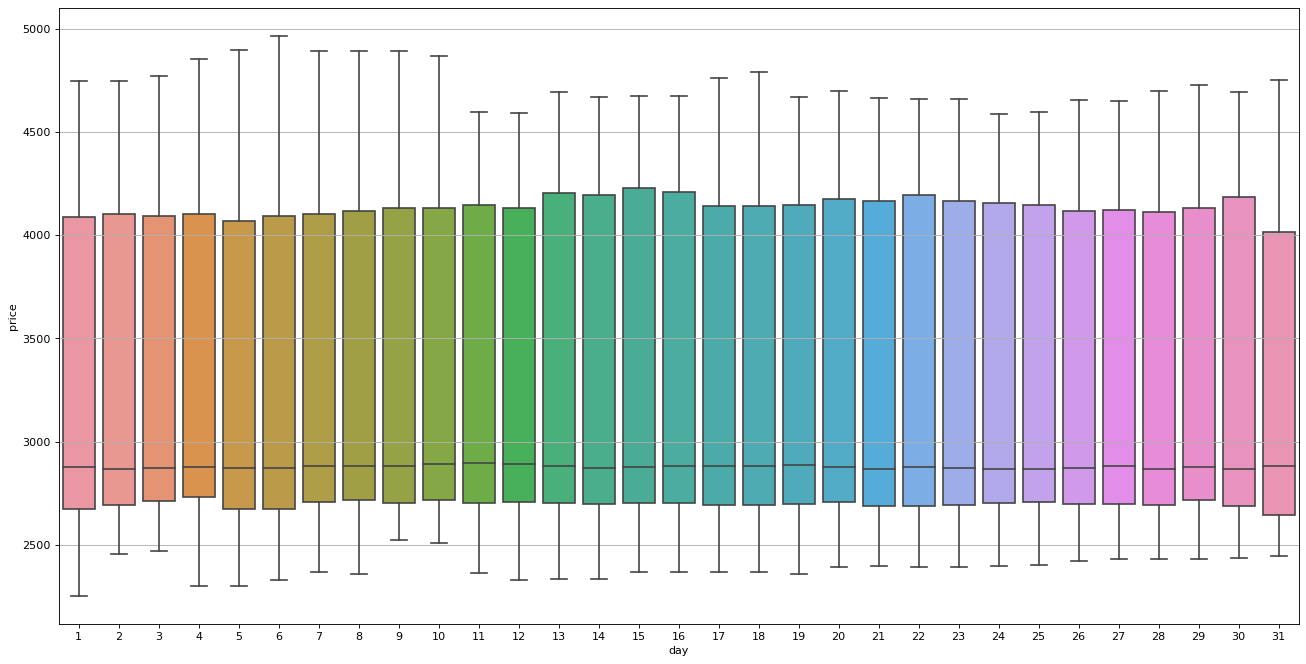

In [23]:
# Day No. Pricing
fig, axes = plt.subplots( figsize=(20,10), dpi= 80)
plt.grid()
sns.boxplot(x='day', y='price', data=df.loc[~df.day.isin([0, 32]), :])

<AxesSubplot:xlabel='weekday', ylabel='price'>

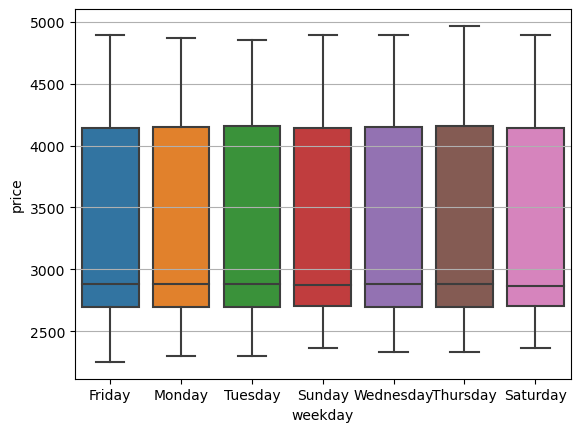

In [24]:
# Weekday Pricing
plt.grid()
sns.boxplot(x='weekday', y='price', data=df.loc[~df.weekday.isin([0, 8]), :])

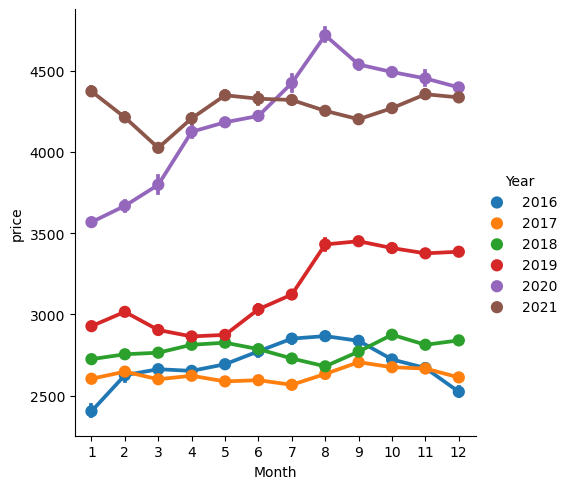

In [25]:
sns.factorplot(data = df, x ="Month", y = "price", hue = "Year")

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
values = df['price'].values
 
# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -0.309904
p-value: 0.924090
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [28]:
upsampled = df.resample('D')
print(upsampled)

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, origin=start_day]


              price  Year  Month  day   weekday
date                                           
2016-01-01  2252.60  2016      1    1    Friday
2016-01-02  2453.15  2016      1    2  Saturday
2016-01-03  2596.80  2016      1    3    Sunday
2016-01-04  2299.80  2016      1    4    Monday
2016-01-05  2301.30  2016      1    5   Tuesday
...             ...   ...    ...  ...       ...
2021-12-17  4394.40  2021     12   17    Friday
2021-12-18  4389.50  2021     12   18  Saturday
2021-12-19  4389.50  2021     12   19    Sunday
2021-12-20  4354.10  2021     12   20    Monday
2021-12-21  4346.50  2021     12   21   Tuesday

[2182 rows x 5 columns]


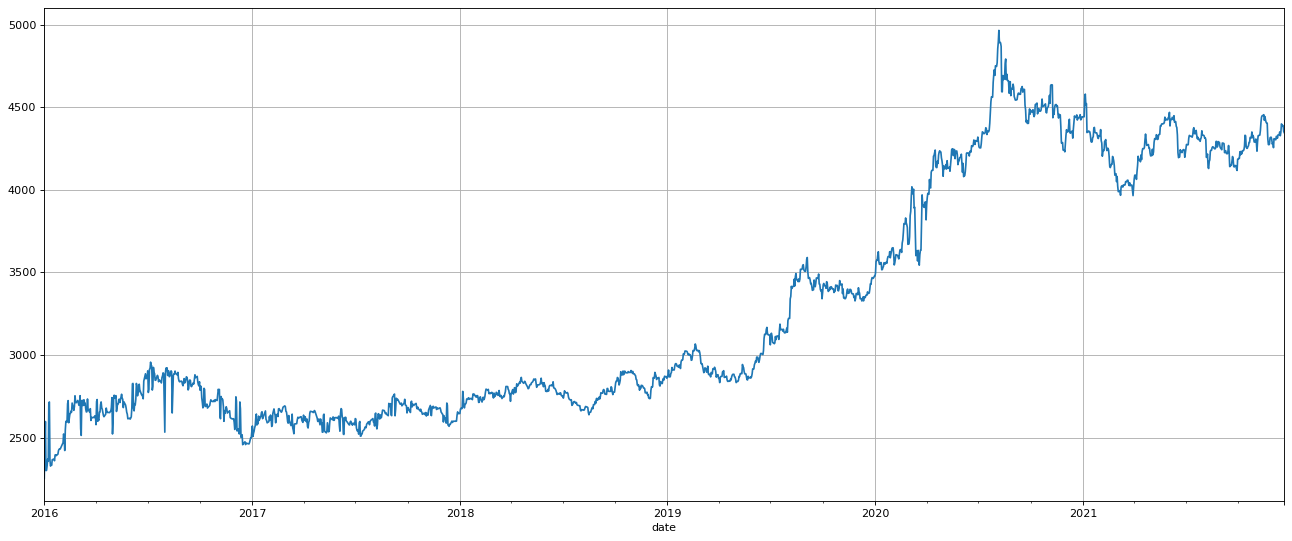

In [29]:
interpolated = upsampled.interpolate(method='linear') ## interplation was done for nan values which we get after doing upsampling by month
print(interpolated)
fig, axes = plt.subplots( figsize=(20,8), dpi= 80)
plt.grid()
interpolated['price'].plot()
plt.grid()
plt.show()

In [30]:
interpolated.tail()

,price,Year,Month,day,weekday
date,,,,,
2021-12-17,4394.4,2021,12,17,Friday
2021-12-18,4389.5,2021,12,18,Saturday
2021-12-19,4389.5,2021,12,19,Sunday
2021-12-20,4354.1,2021,12,20,Monday
2021-12-21,4346.5,2021,12,21,Tuesday


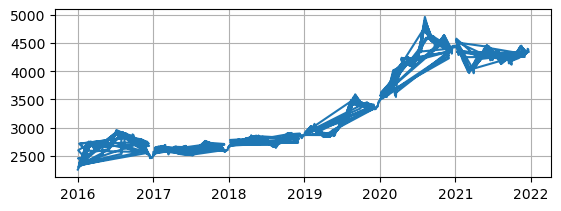

In [31]:
# line plot
plt.subplot(211)
plt.grid()
plt.plot(df['price'])

### Square Root Transform

In [32]:
dataframe = DataFrame(df['price'].values)
dataframe.columns = ['price']
dataframe['price'] = sqrt(dataframe['price'])
dataframe

,price
0,47.461563
1,49.542911
2,52.039408
3,50.772040
4,50.968127
...,...
2177,66.290271
2178,66.253302
2179,66.253302
2180,65.985604


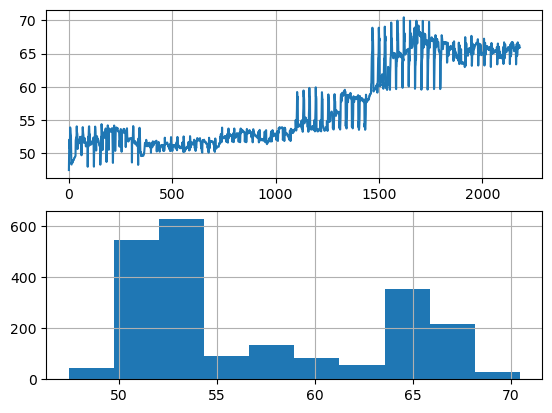

In [33]:
# line plot
plt.subplot(211)
plt.grid()
plt.plot(dataframe['price'])
# histogram
plt.subplot(212)
plt.grid()
plt.hist(dataframe['price'])
plt.show()

### Log Transform

In [34]:
from numpy import log

In [35]:
dataframe1 = DataFrame(df['price'].values)
dataframe1.columns = ['price']
dataframe1['price'] = log(dataframe1['price'])
dataframe1

,price
0,7.719840
1,7.805678
2,7.904003
3,7.854692
4,7.862401
...,...
2177,8.388086
2178,8.386971
2179,8.386971
2180,8.378873


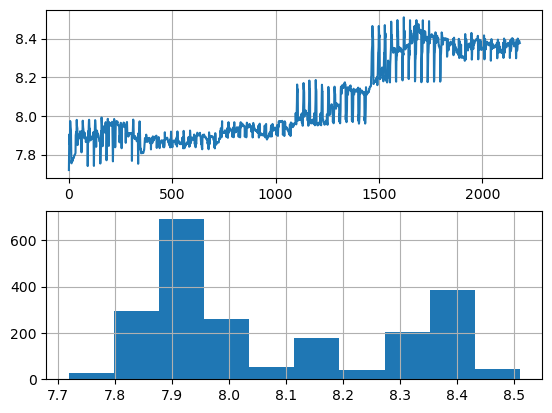

In [36]:
# line plot
plt.subplot(211)
plt.grid()
plt.plot(dataframe1['price'])
# histogram
plt.subplot(212)
plt.grid()
plt.hist(dataframe1['price'])
plt.show()

### Moving Average

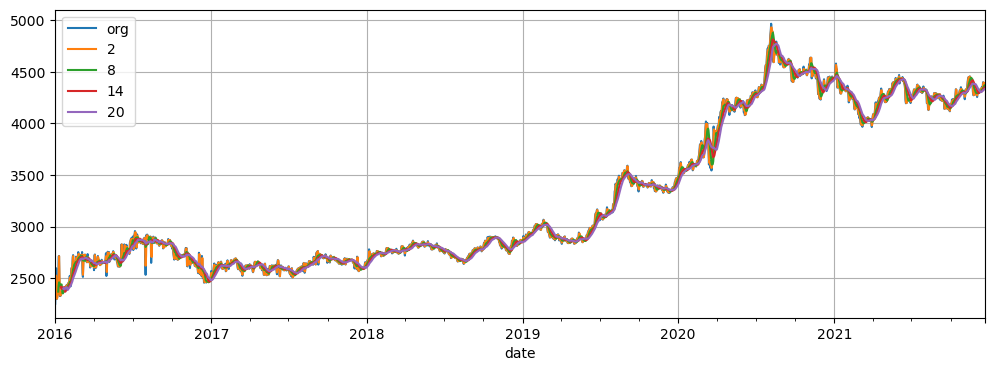

In [42]:
plt.figure(figsize=(12,4))
interpolated.price.plot(label="org")
for i in range(2,24,6):
    interpolated["price"].rolling(i).mean().plot(label=str(i))
plt.grid()
plt.legend(loc='best')

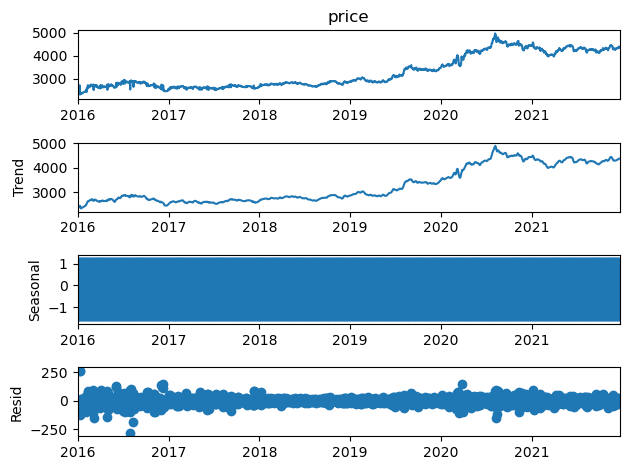

In [43]:
#Time series decomposition plot
decompose_ts_add = seasonal_decompose(interpolated.price)  
decompose_ts_add.plot()
plt.show()

### ACF plots and PACF plots

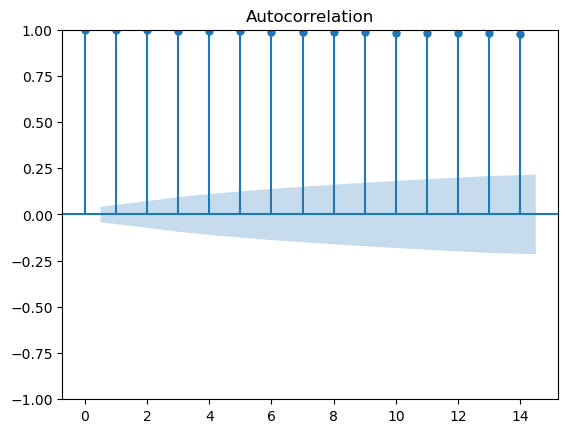

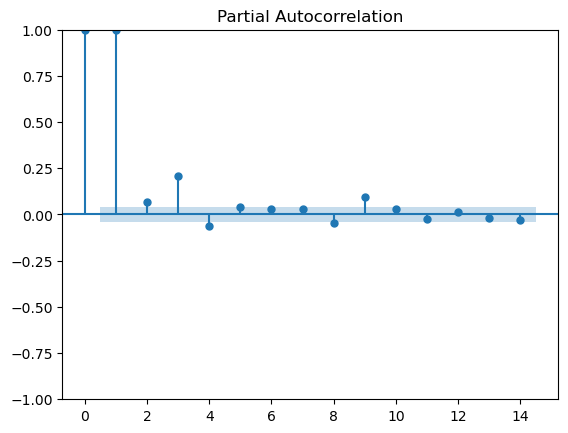

In [44]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.price,lags=14)
tsa_plots.plot_pacf(interpolated.price,lags=14)
plt.show()

In [69]:
values = interpolated['price'].values
 
# passing the extracted passengers count to adfuller function.
# result of adfuller function is stored in a res variable
res = adfuller(values)
 
# Printing the statistical result of the adfuller test
print('Augmneted Dickey_fuller Statistic: %f' % res[0])
print('p-value: %f' % res[1])
 
# printing the critical values at different alpha levels.
print('critical values at different levels:')
for k, v in res[4].items():
    print('\t%s: %.3f' % (k, v))

Augmneted Dickey_fuller Statistic: -0.628260
p-value: 0.864468
critical values at different levels:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [68]:
Train = interpolated.head(1800)
Test = interpolated.tail(382)

In [72]:
Train

,price,Year,Month,day,weekday
date,,,,,
2016-01-01,2252.60,2016,1,1,Friday
2016-01-02,2453.15,2016,1,2,Saturday
2016-01-03,2596.80,2016,1,3,Sunday
2016-01-04,2299.80,2016,1,4,Monday
2016-01-05,2301.30,2016,1,5,Tuesday
...,...,...,...,...,...
2020-11-30,4230.60,2020,11,30,Monday
2020-12-01,4280.80,2020,12,1,Tuesday
2020-12-02,4330.20,2020,12,2,Wednesday


In [71]:
Test

,price,Year,Month,day,weekday
date,,,,,
2020-12-05,4353.6,2020,12,5,Saturday
2020-12-06,4353.6,2020,12,6,Sunday
2020-12-07,4403.2,2020,12,7,Monday
2020-12-08,4427.9,2020,12,8,Tuesday
2020-12-09,4346.1,2020,12,9,Wednesday
...,...,...,...,...,...
2021-12-17,4394.4,2021,12,17,Friday
2021-12-18,4389.5,2021,12,18,Saturday
2021-12-19,4389.5,2021,12,19,Sunday


### Evaluation Metric MAPE

In [73]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [77]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["price"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.price)

2.1943459138554497

In [78]:
# Holt method
hw_model = Holt(Train["price"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.price)

69.4394640072306

In [79]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["price"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.price)

66.53993717574836

In [80]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["price"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.price)

66.58643591459628

In [81]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.price))
rmse_hwe_mul_add

3279.25195868217

### Final Model by combining train and test

In [83]:
hwe_model_add_add = ExponentialSmoothing(interpolated["price"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 

In [84]:
hwe_model_add_add.forecast(30)

2021-12-22    4376.586043
2021-12-23    4393.078259
2021-12-24    4399.463477
2021-12-25    4407.545420
2021-12-26    4404.310581
2021-12-27    4422.597911
2021-12-28    4422.469663
2021-12-29    4430.967621
2021-12-30    4439.710715
2021-12-31    4451.776550
2022-01-01    4458.019784
2022-01-02    4464.386738
2022-01-03    4478.004657
2022-01-04    4494.496873
2022-01-05    4500.882091
2022-01-06    4508.964034
2022-01-07    4505.729195
2022-01-08    4524.016525
2022-01-09    4523.888277
2022-01-10    4532.386235
2022-01-11    4541.129329
2022-01-12    4553.195163
2022-01-13    4559.438398
2022-01-14    4565.805352
2022-01-15    4579.423270
2022-01-16    4595.915486
2022-01-17    4602.300704
2022-01-18    4610.382647
2022-01-19    4607.147808
2022-01-20    4625.435138
Freq: D, dtype: float64

<AxesSubplot:xlabel='Year', ylabel='price'>

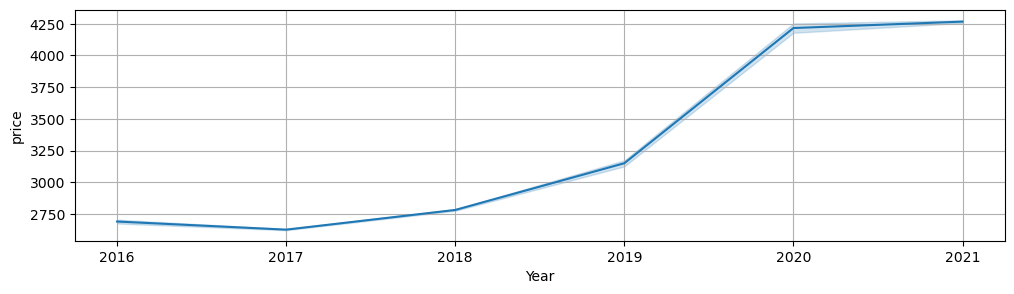

In [85]:
plt.figure(figsize=(12,3))
plt.grid()
sns.lineplot(x="Year",y="price",data=interpolated)

In [87]:
interpolated.reset_index(inplace=True)
interpolated['t'] = 1
interpolated

,date,price,Year,Month,day,weekday,t
0,2016-01-01,2252.60,2016,1,1,Friday,1
1,2016-01-02,2453.15,2016,1,2,Saturday,1
2,2016-01-03,2596.80,2016,1,3,Sunday,1
3,2016-01-04,2299.80,2016,1,4,Monday,1
4,2016-01-05,2301.30,2016,1,5,Tuesday,1
...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,17,Friday,1
2178,2021-12-18,4389.50,2021,12,18,Saturday,1
2179,2021-12-19,4389.50,2021,12,19,Sunday,1
2180,2021-12-20,4354.10,2021,12,20,Monday,1


In [88]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1
interpolated

,date,price,Year,Month,day,weekday,t
0,2016-01-01,2252.60,2016,1,1,Friday,1
1,2016-01-02,2453.15,2016,1,2,Saturday,2
2,2016-01-03,2596.80,2016,1,3,Sunday,3
3,2016-01-04,2299.80,2016,1,4,Monday,4
4,2016-01-05,2301.30,2016,1,5,Tuesday,5
...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,17,Friday,2178
2178,2021-12-18,4389.50,2021,12,18,Saturday,2179
2179,2021-12-19,4389.50,2021,12,19,Sunday,2180
2180,2021-12-20,4354.10,2021,12,20,Monday,2181


In [89]:
interpolated['t_sq'] = (interpolated['t'])**2
## inserted t_sq column with values
interpolated

,date,price,Year,Month,day,weekday,t,t_sq
0,2016-01-01,2252.60,2016,1,1,Friday,1,1
1,2016-01-02,2453.15,2016,1,2,Saturday,2,4
2,2016-01-03,2596.80,2016,1,3,Sunday,3,9
3,2016-01-04,2299.80,2016,1,4,Monday,4,16
4,2016-01-05,2301.30,2016,1,5,Tuesday,5,25
...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,12,17,Friday,2178,4743684
2178,2021-12-18,4389.50,2021,12,18,Saturday,2179,4748041
2179,2021-12-19,4389.50,2021,12,19,Sunday,2180,4752400
2180,2021-12-20,4354.10,2021,12,20,Monday,2181,4756761


In [90]:
interpolated["Month"] = interpolated.date.dt.strftime("%b") # month extraction
interpolated["Year"] = interpolated.date.dt.strftime("%Y") # month extraction
interpolated

,date,price,Year,Month,day,weekday,t,t_sq
0,2016-01-01,2252.60,2016,Jan,1,Friday,1,1
1,2016-01-02,2453.15,2016,Jan,2,Saturday,2,4
2,2016-01-03,2596.80,2016,Jan,3,Sunday,3,9
3,2016-01-04,2299.80,2016,Jan,4,Monday,4,16
4,2016-01-05,2301.30,2016,Jan,5,Tuesday,5,25
...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,Dec,17,Friday,2178,4743684
2178,2021-12-18,4389.50,2021,Dec,18,Saturday,2179,4748041
2179,2021-12-19,4389.50,2021,Dec,19,Sunday,2180,4752400
2180,2021-12-20,4354.10,2021,Dec,20,Monday,2181,4756761


In [91]:
months = pd.get_dummies(interpolated['Month']) ## converting the dummy variables for month column
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0,0,1,0,0,0,0,0,0,0,0,0
2178,0,0,1,0,0,0,0,0,0,0,0,0
2179,0,0,1,0,0,0,0,0,0,0,0,0
2180,0,0,1,0,0,0,0,0,0,0,0,0


In [104]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
## storing the months as serial wise again in months variable
interpolated = pd.concat([interpolated,months],axis=1)

In [105]:
interpolated['log_price'] = np.log(interpolated['price'])
interpolated

,date,price,Year,Month,day,weekday,t,t_sq,log_price,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,1,Friday,1,1,7.719840,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2453.15,2016,Jan,2,Saturday,2,4,7.805128,1,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2596.80,2016,Jan,3,Sunday,3,9,7.862035,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2299.80,2016,Jan,4,Monday,4,16,7.740577,1,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2301.30,2016,Jan,5,Tuesday,5,25,7.741229,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,2021-12-17,4394.40,2021,Dec,17,Friday,2178,4743684,8.388086,0,...,0,0,0,0,0,0,0,0,0,1
2178,2021-12-18,4389.50,2021,Dec,18,Saturday,2179,4748041,8.386971,0,...,0,0,0,0,0,0,0,0,0,1
2179,2021-12-19,4389.50,2021,Dec,19,Sunday,2180,4752400,8.386971,0,...,0,0,0,0,0,0,0,0,0,1
2180,2021-12-20,4354.10,2021,Dec,20,Monday,2181,4756761,8.378873,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='Month', ylabel='Year'>

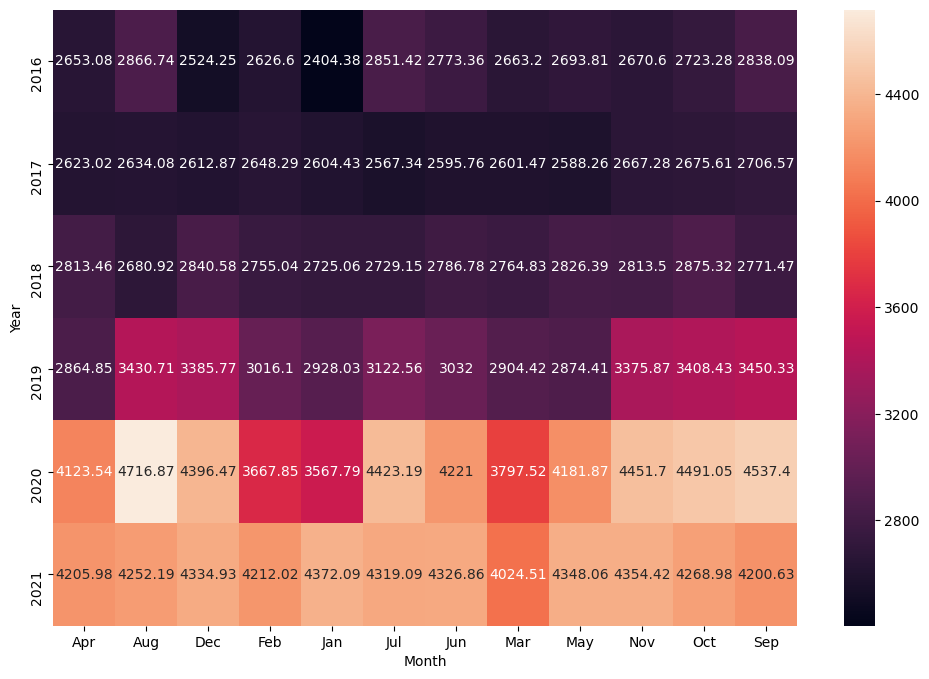

In [106]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="price",index="Year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

In [107]:
Train = interpolated.head(1800)
Test = interpolated.tail(382)

In [108]:
Train

,date,price,Year,Month,day,weekday,t,t_sq,log_price,Jan,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2016-01-01,2252.60,2016,Jan,1,Friday,1,1,7.719840,1,...,0,0,0,0,0,0,0,0,0,0
1,2016-01-02,2453.15,2016,Jan,2,Saturday,2,4,7.805128,1,...,0,0,0,0,0,0,0,0,0,0
2,2016-01-03,2596.80,2016,Jan,3,Sunday,3,9,7.862035,1,...,0,0,0,0,0,0,0,0,0,0
3,2016-01-04,2299.80,2016,Jan,4,Monday,4,16,7.740577,1,...,0,0,0,0,0,0,0,0,0,0
4,2016-01-05,2301.30,2016,Jan,5,Tuesday,5,25,7.741229,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,2020-11-30,4230.60,2020,Nov,30,Monday,1796,3225616,8.350099,0,...,0,0,0,0,0,0,0,0,1,0
1796,2020-12-01,4280.80,2020,Dec,1,Tuesday,1797,3229209,8.361895,0,...,0,0,0,0,0,0,0,0,0,1
1797,2020-12-02,4330.20,2020,Dec,2,Wednesday,1798,3232804,8.373369,0,...,0,0,0,0,0,0,0,0,0,1
1798,2020-12-03,4364.60,2020,Dec,3,Thursday,1799,3236401,8.381282,0,...,0,0,0,0,0,0,0,0,0,1


### Linear Model

In [109]:
import statsmodels.formula.api as smf 
#Linear
linear_model = smf.ols('price~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_linear))**2))
rmse_linear

216.178692432495

In [110]:
#Exponential
Exp = smf.ols('log_price~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

215.192721817221

In [111]:
#Quadratic 
Quad = smf.ols('price~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_Quad))**2))
rmse_Quad

1110.7306899441576

In [112]:
#Additive seasonality 
add_sea = smf.ols('price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea))**2))
rmse_add_sea

1228.7451430022895

In [113]:
#Additive Seasonality Quadratic 
add_sea_Quad = smf.ols('price~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['price'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

1102.0792294877535

In [114]:
#Multiplicative Seasonality
Mul_sea = smf.ols('log_price~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1274.6850140631561

In [115]:
#Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_price~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['price'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

287.88167247203904

In [116]:
#Compareing the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
1,rmse_Exp,215.192722
0,rmse_linear,216.178692
6,rmse_Mult_add_sea,287.881672
4,rmse_add_sea_quad,1102.079229
2,rmse_Quad,1110.730690
3,rmse_add_sea,1228.745143
5,rmse_Mult_sea,1274.685014


In [130]:
import pickle

In [133]:
filename = "trained_model1.sav"
pickle.dump(hwe_model_add_add, open(filename,'wb'))

In [134]:
# loading the saved model
loaded_model = pickle.load(open("trained_model1.sav",'rb'))

In [135]:
loaded_model.forecast(20)

2021-12-22    4376.586043
2021-12-23    4393.078259
2021-12-24    4399.463477
2021-12-25    4407.545420
2021-12-26    4404.310581
2021-12-27    4422.597911
2021-12-28    4422.469663
2021-12-29    4430.967621
2021-12-30    4439.710715
2021-12-31    4451.776550
2022-01-01    4458.019784
2022-01-02    4464.386738
2022-01-03    4478.004657
2022-01-04    4494.496873
2022-01-05    4500.882091
2022-01-06    4508.964034
2022-01-07    4505.729195
2022-01-08    4524.016525
2022-01-09    4523.888277
2022-01-10    4532.386235
Freq: D, dtype: float64